In [1]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('..')
import utility_functions.network_probability as network_probability

In [2]:
# generate erdos_renyi graph
g = nx.erdos_renyi_graph(10, 0.5)

# print graph g
print(g)

Graph with 10 nodes and 21 edges


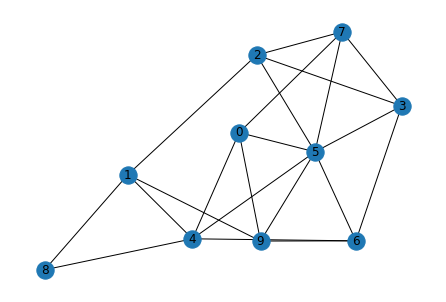

In [3]:
nx.draw(g, with_labels=True)

getting the diameter of the network

In [4]:
nx.distance_measures.diameter(g)

3

degree distribution

In [5]:
# get the degree distribution of G(n, p)
degree_distribution_hist = nx.degree_histogram(g)
print(degree_distribution_hist)

# get degree distribution
degree_distribution = network_probability.degree_distribution_of_random_network(10, 5, 0.5)
print(degree_distribution)

print(np.average(degree_distribution_hist))

[0, 0, 1, 0, 7, 1, 0, 1]
0.24609375
1.25


In [6]:
# get degree of entire graph g
degree = nx.degree(g)
print(degree)

[(0, 4), (1, 4), (2, 4), (3, 4), (4, 5), (5, 7), (6, 4), (7, 4), (8, 2), (9, 4)]


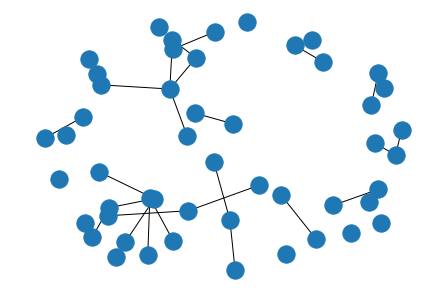

In [7]:
rand_graph = nx.fast_gnp_random_graph(n=50, p=0.02, directed=False)
pos = nx.spring_layout(rand_graph, k=0.5)
nx.draw(rand_graph, pos=pos, with_labels=False)

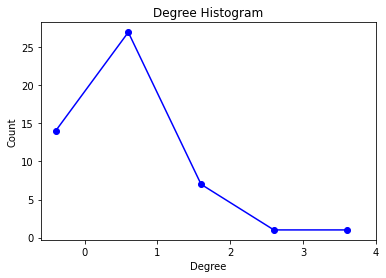

In [8]:
degree_sequence = sorted([d for n, d in rand_graph.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.plot(deg, cnt, 'b-', marker='o')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.show()

In [9]:
# average cluster size of g
nx.average_clustering(g)

0.5061904761904761

In [10]:
# the transitivity of a cluster is the fraction 
# of all possible triangles that exist in the cluster
nx.transitivity(g)

0.44594594594594594

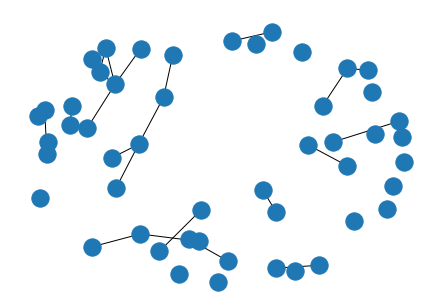

In [11]:
# spring algorithm tries to move nodes on a page with those mostly connected to one another

# plot rand_graph with spring algorithm
pos = nx.spring_layout(rand_graph, k=0.5)
nx.draw(rand_graph, pos=pos, with_labels=False)


In [12]:
def average_degree_centrality(g):
    """
    Returns the average degree centrality of network g.
    """
    if not isinstance(g, nx.Graph):
        raise ValueError('g must be a networkx Graph')
    
    degree_centrality = nx.degree_centrality(g)
    average_degree_centrality = np.mean(list(degree_centrality.values()))
    
    return average_degree_centrality

In [13]:
# get average degree centrality of rand_graph
print(average_degree_centrality(rand_graph))


# nx.degree_centrality(rand_graph)

0.019591836734693877


degree centrality = $\frac{degree}{n-1}$

In [14]:
def average_degree_centrality(g):
    """
    Returns the average degree centrality of network g.
    """
    if not isinstance(g, nx.Graph):
        raise ValueError('g must be a networkx Graph')
    
    degree_centrality = nx.degree_centrality(g)
    average_degree_centrality = np.mean(list(degree_centrality.values()))
    
    return average_degree_centrality

In [15]:
# closeness centrality is the average distance between a node and all other nodes in the network
# the higher the closeness centrality, the more central the node is
nx.closeness_centrality(rand_graph)

# get average closeness centrality of rand_graph
print(np.mean(list(nx.closeness_centrality(rand_graph).values())))

0.023761580822805307


Closeness Centrality = $\frac{n-1}{\sum_{j}{I(i,j)}}$

Decay Centrality = $C_{i}^{d}(g) = \sum_{j \ne i}\delta^{I(i,j)}$ $\\$
where $\delta$ near 1 becomes component size $\\$
$\delta$ near 0 becomes degree $\\$
$\delta$ in between decaying distance measure $\\$
\- weights distance exponentially

Normalize Decay Centrality = $C_{i}^{d}(g) = \sum_{j \ne i}\frac{\delta^{I(i,j)}}{(n-1)\delta}$ $\\$

Betweenness (Freeman) Centrality:
$P(i, j)$ is the number of geodesics between i and j
$P_k(i, j)$ is the number of geodesics between i and j that k lies on

$\sum_{i, j \ne k} \frac{\frac{P_k(i, j)}{P(i, j)}}{\frac{(n-1)(n-2)}{2}}$

In [16]:
# determine eigenvector centrality of rand_graph
eig = nx.eigenvector_centrality(rand_graph)
# top 5 eigenvectory centrality nodes
print(sorted(eig.items(), key=lambda x: x[1], reverse=True)[:5])

[(6, 0.6358554861206036), (15, 0.47348615440107844), (16, 0.47348615440107844), (8, 0.2713940934701518), (31, 0.2713940934701518)]


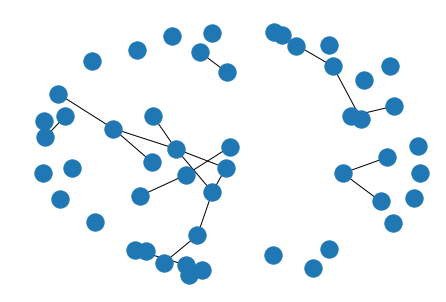

In [17]:
p = 0.02
poisson_graph_02 = nx.fast_gnp_random_graph(n=50, p=p, directed=False)
pos = nx.spring_layout(poisson_graph_02, k=0.5)
nx.draw(poisson_graph_02, pos=pos, with_labels=False)

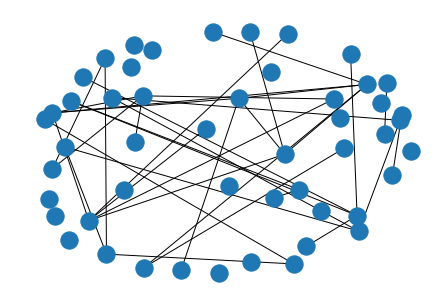

In [18]:
p = 0.03
poisson_graph_03 = nx.fast_gnp_random_graph(n=50, p=p, directed=False)
pos = nx.spring_layout(poisson_graph_02, k=0.5)
nx.draw(poisson_graph_03, pos=pos, with_labels=False)

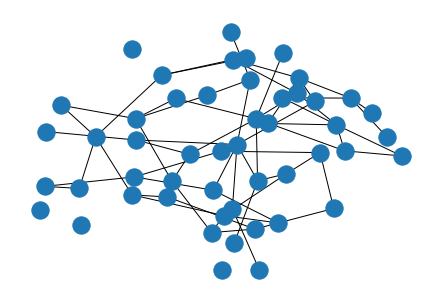

In [19]:
p=0.05
poisson_graph_05 = nx.fast_gnp_random_graph(n=50, p=p, directed=False)
pos = nx.spring_layout(poisson_graph_05, k=0.5)
nx.draw(poisson_graph_05, pos=pos, with_labels=False)

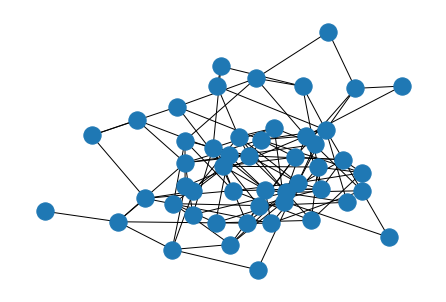

In [20]:
p = 0.1
poisson_graph_1 = nx.fast_gnp_random_graph(n=50, p=p, directed=False)
pos = nx.spring_layout(poisson_graph_1, k=0.5)
nx.draw(poisson_graph_1, pos=pos, with_labels=False)

## Models to Generate Clustering

### Small World Model (Watts & Strogatz 1999)

Erdös-Renyi misses clustering because clustering is on the order of p and going to 0 unless average degree is becomining inifinite
Instead .. start with ring-lattice
So start with clustering but high diameter
- a few randomly placed links will shrink the diameter
- From 2.9 
    - "Watts and Strogatz (1999) provides a simple procedure to generate networks that have both high clustering and low diameter, both of which occur often in observed networks. The model is not great at generating degree distributions that match observed ones."

Rewired Lattice
start with a lattice where nodes are highly clustered
add in links across the lattice

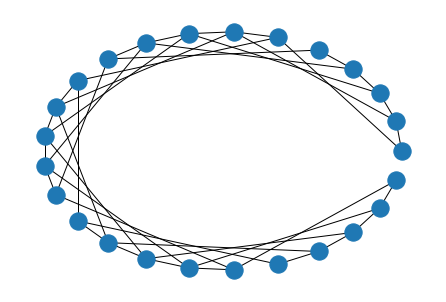

In [21]:
lattice = nx.grid_2d_graph(5, 5)
pos = nx.circular_layout(lattice)
nx.draw(lattice, pos=pos, with_labels=False)

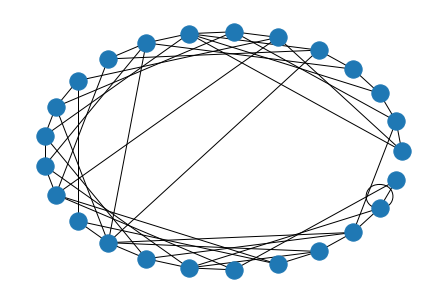

In [22]:
for i in range(10):
    u = list(lattice.nodes())[np.random.choice(np.arange(0, lattice.number_of_nodes()-1))]
    v = list(lattice.nodes())[np.random.choice(np.arange(0, lattice.number_of_nodes()-1))]
    lattice.add_edge(u, v)

pos = nx.circular_layout(lattice)
nx.draw(lattice, pos=pos, with_labels=False)